In [1]:
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
from matplotlib import ticker
import scipy.io as sio
import statistics as st



In [79]:
# The 'HeyYou' variants return a record of the evolution of private belief. 



# Code to run a single trial
def oneRunDiscreteHeyYou (n,c,th,p,q):
    
    nInt = int(n)
    x = np.zeros((nInt))
    #print(x)
    xEvolve = np.zeros((200000,nInt))
    acc = 1
    
    runTime = 0
    
    # Check if someone has reached the threshold
    while np.abs(x).max() < th:
        
        # Check if this update will be correlated
        if  np.random.uniform() <= c:
            # Correlated! Choose according to p,q,s
            what = np.random.uniform()
            if what < 1-p:
                if what < q:
                    update = np.repeat(-1,nInt)
                else:
                    update = np.repeat(0,nInt)
            else:
                update = np.repeat(1,nInt)
        else:
            # not correlated, alas.
            george = np.random.uniform(nInt)
            update = np.repeat(0,nInt)
            update[np.where(george < q)] = -1
            update[np.where(george > 1-p)] = 1
            

        x = x + update
        xEvolve[runTime] = x
        runTime += 1

    if np.min(x) == -th: acc = 0
    return runTime, acc,xEvolve


def oneRunDiscrete (n,c,th,p,q):
    
    nInt = int(n)
    x = np.zeros((nInt))

    acc = 1
    
    runTime = 0
    
    # Check if someone has reached the threshold
    while np.abs(x).max() < th:
        
        # Check if this update will be correlated
        if  np.random.uniform() <= c:
            # Correlated! Choose according to p,q,s
            what = np.random.uniform()
            if what < 1-p:
                if what < q:
                    update = np.repeat(-1,nInt)
                else:
                    update = np.repeat(0,nInt)
            else:
                update = np.repeat(1,nInt)
        else:
            # not correlated, alas.
            george = np.random.uniform(nInt)
            update = np.repeat(0,nInt)
            update[np.where(george < q)] = -1
            update[np.where(george > 1-p)] = 1
            

        x = x + update
        runTime += 1

    if np.min(x) == -th: acc = 0
    return runTime, acc

#@njit(parallel = True)
# Code to run a batch of trials (numTrials worth)
def oneBatchDiscreteHeyYou(n=5,c=.1,th=10,numTrials = 100,p = .5):
    
    q = p/np.exp(1)
    # Choose the timestep as a function of the expected time
    if n == 1: dt = .00001
    else:  dt = (th**2/(4*np.log(n)))/500
    
    # Only calculate constants once... 
    
    
    times = np.zeros(numTrials); accs = np.zeros(numTrials)
    #evolution = np.zeros(numTrials,n,200)
    #for i in prange(numTrials):
    for i in range(numTrials):
        
        runTime,acc,evo  = oneRunDiscreteHeyYou(float(n),c,th,p,q)
        times[i] = runTime; accs[i] = acc

    
    
    return np.mean(times),np.mean(accs),accs,times

def oneBatchDiscrete(n=5,c=.1,th=10,numTrials = 100,p = .5):
    
    q = p/np.exp(1)
    # Choose the timestep as a function of the expected time
    if n == 1: dt = .00001
    else:  dt = (th**2/(4*np.log(n)))/500
    
    # Only calculate constants once... 
    
    
    times = np.zeros(numTrials); accs = np.zeros(numTrials)
    #evolution = np.zeros(numTrials,n,200)
    #for i in prange(numTrials):
    for i in range(numTrials):
        
        runTime,acc  = oneRunDiscrete(float(n),c,th,p,q)
        times[i] = runTime; accs[i] = acc

    
    
    return np.mean(times),np.mean(accs),accs,times

Text(0, 0.5, 'accuracy')

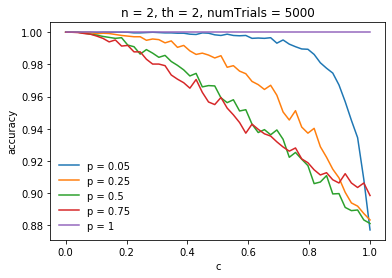

In [68]:
# accuracy vs correlation probability c
n = 2;  th = 2
p_array = [.05,.25,.5,.75,1]
numTrials = 5000
c_array = [0,.1,.25,.5,.75,.9,1]
c_array = np.linspace(0,1)

for p in p_array:
    accs = []
    for c in c_array:
        erg = oneBatchDiscrete(n,c,th,numTrials,p)
        accs.append(erg[1])
    plt.plot(c_array,accs, label = "p = " + str(p))

plt.legend(frameon = False)
plt.title("n = " + str(n) + ", th = " + str(th) + ", numTrials = " + str(numTrials))
plt.xlabel("c"); plt.ylabel("accuracy")

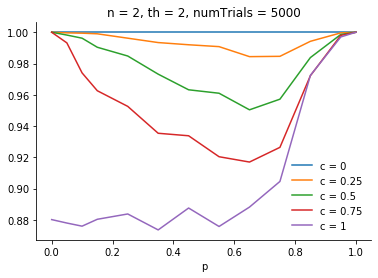

In [89]:
# accuracy vs p
c_array = [0,0.25,.5,.75,1]; th = 2
p_array = [.0001,.05,.1,.15,.25,.35,.45,.55,.65,.75,.85,.95,1]
#p_array = [.2,.3,.35,.4,.45,.5,.55,.6,.65,.7,.8]
numTrials = 5000
for c in c_array:
    accs = []
    for p in p_array:
        erg = oneBatchDiscrete(n,c,th,numTrials,p)
        accs.append(erg[1])
    
    plt.plot(p_array,accs, label = "c = " + str(c))
plt.xlabel("p"); plt.ylabel = "accuracy"
plt.legend(frameon = False)
plt.title("n = " + str(n) + ", th = " + str(th) + ", numTrials = " + str(numTrials))
sns.despine()

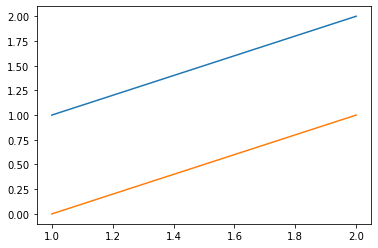

In [88]:
# plot belief evolution of a single trial
c = .9; n = 2; th = 2
p = .4
time, acc, evo = oneRunDiscreteHeyYou (n,c,th,p,q)

plt.plot(np.linspace(0,time,num = time+1),evo[0:time,0], label = "agent 1")
plt.plot(np.linspace(0,time,num=time+1),evo[0:time,1], label = 'agent 2')


plt.ylabel("private belief"); plt.xlabel("time")
plt.legend(frameon = False)
plt.title("n = " + str(n) + ", th = " + str(th) + ", numTrials = " + str(numTrials))
sns.despine()